<a href="https://colab.research.google.com/github/Aarushi900/Text_Mining/blob/main/Lab_sheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labsheet 4**
# **Clustering Text Data in Python**

**Objective:**

This lab will guide you through the process of clustering text data using different clustering techniques: K-means, K-medoids, and Agglomerative clustering. By the end of the lab, you'll have hands-on experience with these algorithms and understand how to apply them to text data.

1. Preprocessing Text Data

   Load the Datase: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load the dataset:

In [2]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [fileid.split('/')[0] for fileid in movie_reviews.fileids()]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


2. Text Preprocessing

   Tokenize, remove stopwords, and lemmatize the text

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

processed_documents = [preprocess_text(doc) for doc in documents]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


3. Convert Text to Numerical Data

    Use TF-IDF to convert text data into numerical format

In [4]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(processed_documents).toarray()

**Part 2: K-means Clustering**

1. Apply K-means Clustering

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2. Visualize the Clusters

    Use TruncatedSVD to reduce dimensions and visualize the clusters:

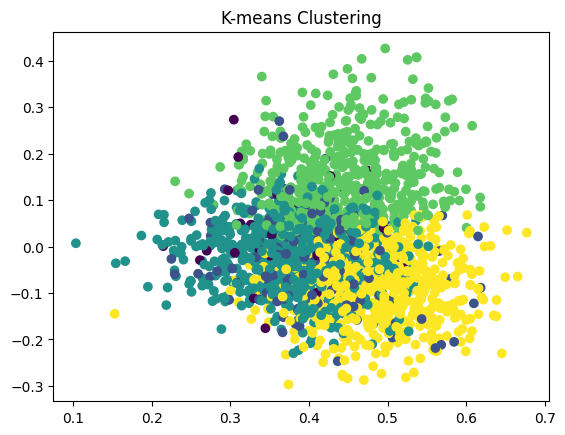

In [6]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-means Clustering')
plt.show()


**Part 3: K-medoids Clustering**

1.Install and Import Necessary Libraries

   Install the sklearn_extra library for K-medoids clustering:

In [7]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.0 MB/s eta 0:00:00


Import the required module:

In [8]:
from sklearn_extra.cluster import KMedoids

2. Apply K-medoids Clustering

In [9]:
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids.fit(X)
labels_kmedoids = kmedoids.labels_


3. Visualize the Clusters



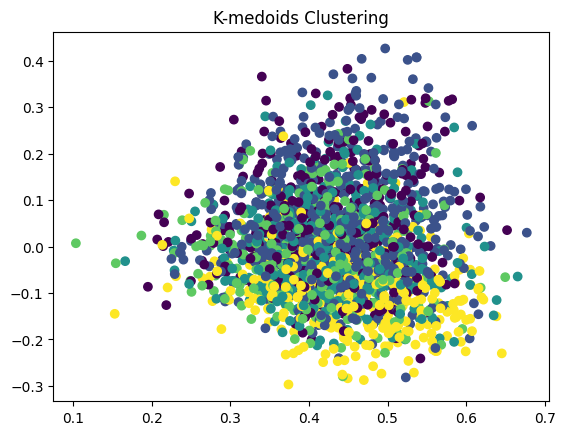

In [10]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmedoids, cmap='viridis')
plt.title('K-medoids Clustering')
plt.show()


**Part 4: Agglomerative Clustering**

1. Apply Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X)


2. Visualize the Clusters

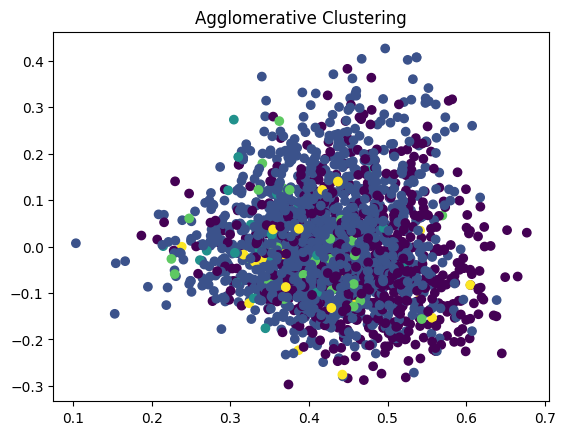

In [12]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


**Part 5: Evaluation**
1. Silhouette Score

    Calculate the silhouette score for each clustering method:

In [13]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X, labels_kmeans)
score_kmedoids = silhouette_score(X, labels_kmedoids)
score_agglo = silhouette_score(X, labels_agglo)

print(f'Silhouette Score for K-means: {score_kmeans}')
print(f'Silhouette Score for K-medoids: {score_kmedoids}')
print(f'Silhouette Score for Agglomerative Clustering: {score_agglo}')


Silhouette Score for K-means: 0.009157473303154123
Silhouette Score for K-medoids: -0.00047377512129200737
Silhouette Score for Agglomerative Clustering: 0.0037680412948688366


Excercise

1. Implement the K-means algorithm from scratch, and introduce modifications or improvements to enhance its performance compared to the traditional K-means algorithm. Explain the rationale behind your improvements and how they address the limitations of the standard K-means method.

2. Implement Agglomerative Clustering using Single, Complete, and Average Linkage methods. Apply these methods to a dataset, visualize the clustering results, and compare the performance and outcomes of the three methods using appropriate evaluation metrics.

In [22]:
import numpy as np

def kmeans(X, K, max_iters=100, tol=1e-4):
    np.random.seed(0)
    m, n = X.shape

    # Initialize centroids randomly from existing data points
    centroids = X[np.random.choice(m, K, replace=False)]

    for _ in range(max_iters):
        # Compute distances and assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, labels


Improvements to K-means
Initialization with K-means++:

K-means++ improves centroid initialization by spreading out the initial centroids, which can lead to better convergence and avoid poor local minima.

In [23]:
def kmeans_plus_plus_init(X, K):
    np.random.seed(0)
    m, n = X.shape
    centroids = np.empty((K, n))
    centroids[0] = X[np.random.choice(m)]

    for i in range(1, K):
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids[:i]], axis=0)
        probabilities = distances / np.sum(distances)
        centroids[i] = X[np.random.choice(m, p=probabilities)]

    return centroids

def kmeans_with_plus_plus(X, K, max_iters=100, tol=1e-4):
    centroids = kmeans_plus_plus_init(X, K)

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, labels


Mini-Batch K-means:

Mini-Batch K-means uses a subset of the data to update centroids, which speeds up the algorithm for large datasets.

In [24]:
def mini_batch_kmeans(X, K, batch_size=100, max_iters=100, tol=1e-4):
    np.random.seed(0)
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]

    for _ in range(max_iters):
        # Randomly sample a batch of data points
        indices = np.random.choice(m, batch_size, replace=False)
        batch = X[indices]

        distances = np.linalg.norm(batch[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for k in range(K):
            points_in_cluster = batch[labels == k]
            if len(points_in_cluster) > 0:
                centroids[k] = np.mean(points_in_cluster, axis=0)

    return centroids, labels


2. Agglomerative Clustering with Different Linkage Methods
Agglomerative clustering is a hierarchical clustering method that builds the hierarchy from individual points by successively merging clusters.

Implementing Agglomerative Clustering
Here’s a basic implementation of Agglomerative Clustering using different linkage methods:

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

def agglomerative_clustering(X, method='single', t=2):
    Z = linkage(X, method=method)
    labels = fcluster(Z, t=t, criterion='maxclust')
    return Z, labels

def plot_dendrogram(Z, title='Dendrogram'):
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(title)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

Applying Linkage Methods

Single Linkage:
Merges clusters based on the minimum distance between points in the clusters.

Complete Linkage:
Merges clusters based on the maximum distance between points in the clusters.

Average Linkage:
Merges clusters based on the average distance between all points in the clusters.

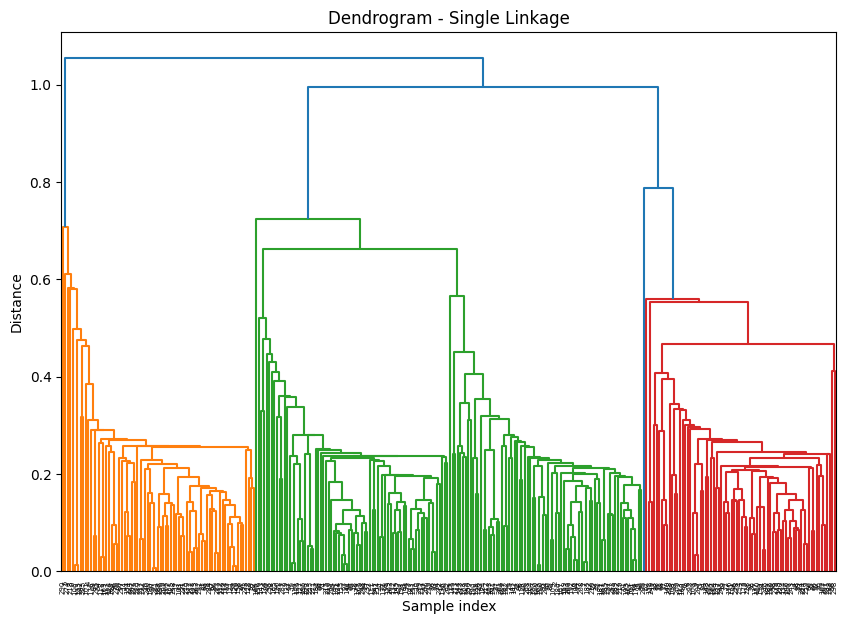

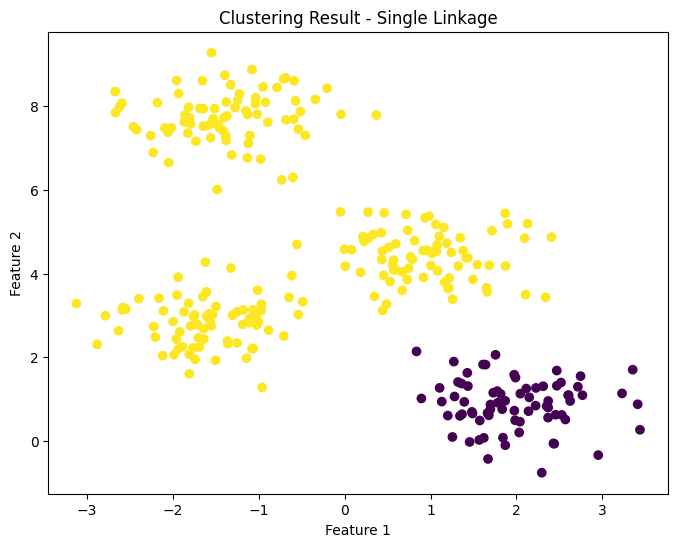

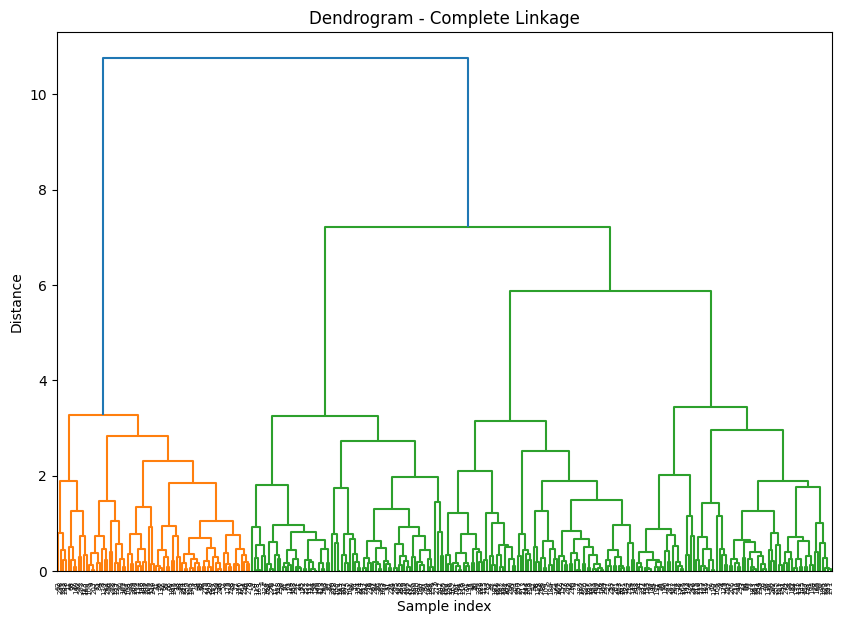

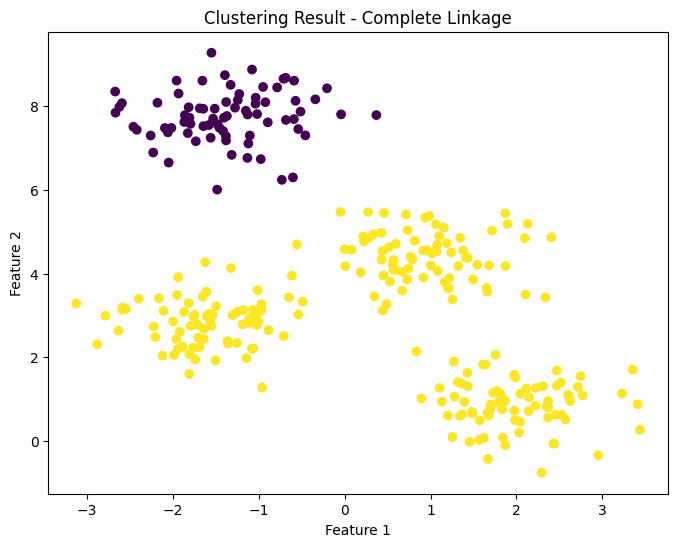

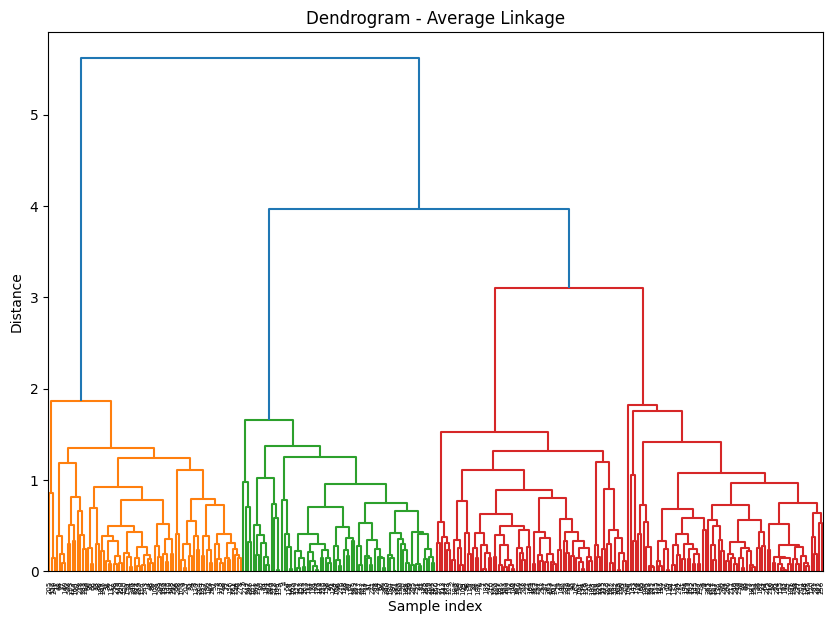

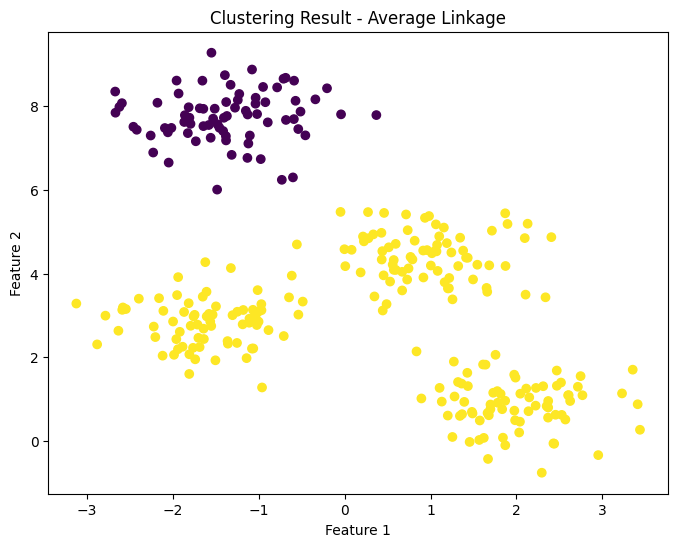

In [20]:
# Generate synthetic data for demonstration
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform clustering using different methods
methods = ['single', 'complete', 'average']
for method in methods:
    Z, labels = agglomerative_clustering(X, method=method)
    plot_dendrogram(Z, title=f'Dendrogram - {method.capitalize()} Linkage')

    # Optional: Plot the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clustering Result - {method.capitalize()} Linkage')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


3. Evaluation Metrics and Comparison

For evaluating clustering results, you can use metrics like:

Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.


Davies-Bouldin Index: The average similarity ratio of each cluster with its most similar one, where a lower score indicates better clustering.
Inertia (for K-means): Measures the sum of squared distances between samples and their cluster center.

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Index: {davies_bouldin}')


Silhouette Score: 0.54731479631826
Davies-Bouldin Index: 0.5473445971160211
